In [5]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
X = pd.DataFrame(data=wine.data, columns=wine.feature_names)
y = wine.target
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
X_scaled = scaler.fit_transform(X)

# Convert the standardized features back to a DataFrame (optional)
X = pd.DataFrame(X_scaled, columns=wine.feature_names)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import Birch
from itertools import product


number_of_clusters = 3
threshold_values = [i/10 for i in range(1,25)]
branching_factor_values = [i for i in range(10,110,10)]
split_values = [i / 100 for i in range(10, 55, 5)]

best_model = None
best_score = float('-inf')
best_train_test_ratio = 0.0
best_param_list = []
best_pred_y = 0
best_test_y = 0

# model = KMeans(n_clusters=number_of_clusters, init=init, n_init=5000, max_iter=10000000, tol=1e-7)
# train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=None,test_size=0.25)
# model.fit(train_X,train_y)
# pred_y = model.fit_predict(test_X)
# score = accuracy_score(test_y,pred_y)
# print(score)


for threshold, branching_factor, split in product(threshold_values, branching_factor_values, split_values):
    train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size=split)
    model = Birch(n_clusters=3, threshold=threshold, branching_factor=branching_factor)
    model.fit(train_X, train_y)
    pred_y = model.fit_predict(test_X)
    score = accuracy_score(test_y, pred_y)

    if score > best_score and model.n_clusters==3 :
        best_score = score
        best_train_test_ratio = split
        best_model = model
        best_param_list = [threshold, branching_factor, split]
        best_pred_y = pred_y
        best_test_y = test_y
print(best_param_list)
print(best_score)

[1.4, 60, 0.15]
1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

Confusion Matrix: 

[[12  0  0]
 [ 0  9  0]
 [ 0  0  6]]




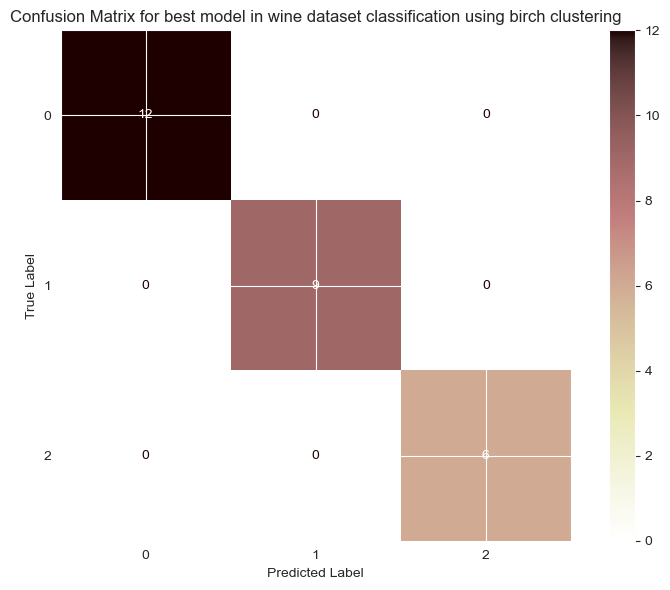

Rand Index: 1.0
Adjusted Rand Index: 1.0
Mutual Information: 1.0608569471580214
Adjusted Mutual Information: 1.0
Normalized Mutual Information: 1.0
Silhouette Coefficient: 0.2797798205630649
Calinski-Harabasz Index: 68.25192687077893
Davies-Bouldin Index: 1.406587076416


In [11]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(best_test_y, best_pred_y)
print(classification_report(best_test_y, best_pred_y))
print("Confusion Matrix: \n")
print(cm)
print("\n")

fig, ax = plt.subplots(figsize=(8, 6))
cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2]))
cm_display.plot(ax=ax, cmap='pink_r', values_format='d')
# Add a title and labels
ax.set_title('Confusion Matrix for best model in wine dataset classification using birch clustering')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.tight_layout()
# Show the Confusion Matrix
plt.show()
from sklearn import metrics

rand_index = metrics.rand_score(best_test_y, best_pred_y)
adjusted_rand_index = metrics.adjusted_rand_score(best_test_y, best_pred_y)

# Mutual Information and Adjusted Mutual Information
mutual_info = metrics.mutual_info_score(best_test_y, best_pred_y)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(best_test_y, best_pred_y)
normalized_mutual_info = metrics.normalized_mutual_info_score(best_test_y, best_pred_y)

# Silhouette Coefficient, Calinski-Harabasz Index, and Davies-Bouldin Index
silhouette_coefficient = metrics.silhouette_score(X, y)
calinski_harabasz_index = metrics.calinski_harabasz_score(X, y)
davies_bouldin_index = metrics.davies_bouldin_score(X, y)

print("Rand Index:", rand_index)
print("Adjusted Rand Index:", adjusted_rand_index)
print("Mutual Information:", mutual_info)
print("Adjusted Mutual Information:", adjusted_mutual_info)
print("Normalized Mutual Information:", normalized_mutual_info)
print("Silhouette Coefficient:", silhouette_coefficient)
print("Calinski-Harabasz Index:", calinski_harabasz_index)
print("Davies-Bouldin Index:", davies_bouldin_index)